# Laborator 1, partea 1 - Introducere in analiza imaginilor 

* Modalitate deschidere imagine color/ nivele de gri 
* Extragere componente R,G,B
* Afisare cub RGB

In [17]:
# Fiecare lucrare de laborator se va finaliza prin printarea script-ului 
#   sub forma unui raport si incarcarea lui online 
# Rapoartele trebuie incarcate pana la sfarsitul orei de laborator!!!

# Lucrare de laborator realizata de:
NumeStudent = "Oscar Gal"
Specializare = "TM" # TM/ TC/ SICAS
print("Lucrare de laborator realizata de: ", NumeStudent)
print(" \t de la specializarea: ", Specializare)


Lucrare de laborator realizata de:  Oscar Gal
 	 de la specializarea:  TM


### Instalare și import pachete python

* Instalare pachet **OpenCV** (daca este cazul):

    `pip install opencv-contrib-python` 


* Import pachete: *os, numpy, pyplot, Axes3D*

In [2]:
# import pachete 

import os
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Deschiderea si afisarea imaginilor

 *recomand salvarea imaginilor in directorul*
 

In [3]:
# Setare cale locatie imagini si nume fisier imagine

imgsPath = "/Users/galoscar07/Documents/master2k20-2k22/2nd Semester/SIAI/Laborator/_TestImages" 
imgName = 'ImgTstColor/1622682_10152253888149875_708884683_n.jpg'

imgFile = os.path.sep.join([imgsPath, imgName])
print(" Numele fisierului este:", imgFile)

 Numele fisierului este: /Users/galoscar07/Documents/master2k20-2k22/2nd Semester/SIAI/Laborator/_TestImages/ImgTstColor/1622682_10152253888149875_708884683_n.jpg



 Imaginea originala 


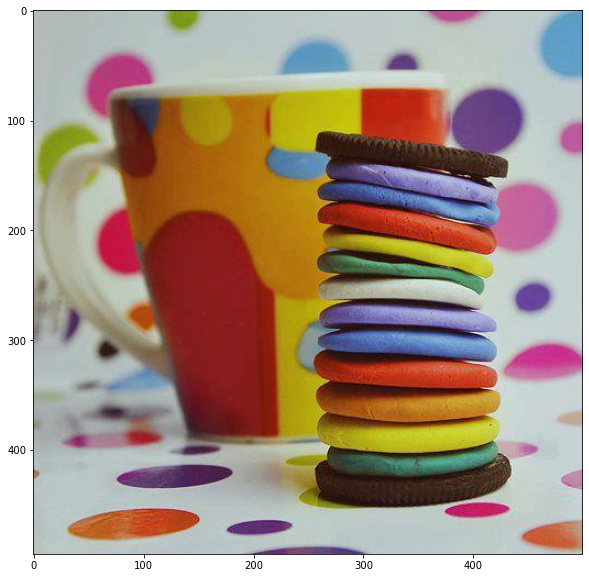

In [4]:
# Deschidere si afisare imagine

print('\n Imaginea originala ')
imgBGR = cv2.imread(imgFile) 
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB) 

fig = plt.figure(figsize=(10,10)); plt.imshow(imgRGB); plt.show()

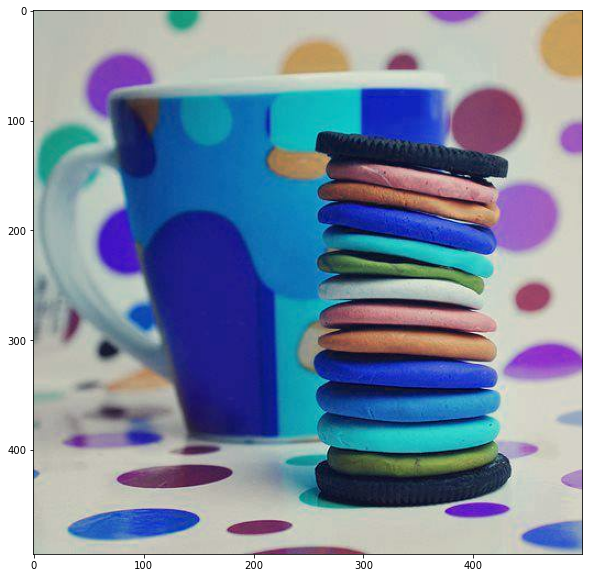

In [5]:
# Afisati imaginea incarcata in format BGR 
#    salvata in variabila - imgBGR

fig = plt.figure(figsize=(10,10)); plt.imshow(imgBGR); plt.show()

In [6]:
# Urmatim dimensiunea (shape) si tipul (dtype) variabilei 
#   in care s-a incarcat imaginea

print("         Shape:" , imgRGB.shape)
print("         Type :" , imgRGB.dtype)

         Shape: (495, 500, 3)
         Type : uint8


In [7]:
# deschidere imagine direct pe nivele de gri 
# - se utilizeaza parametru 'flag' = 0 

imgGray = cv2.imread(imgFile, 0) 

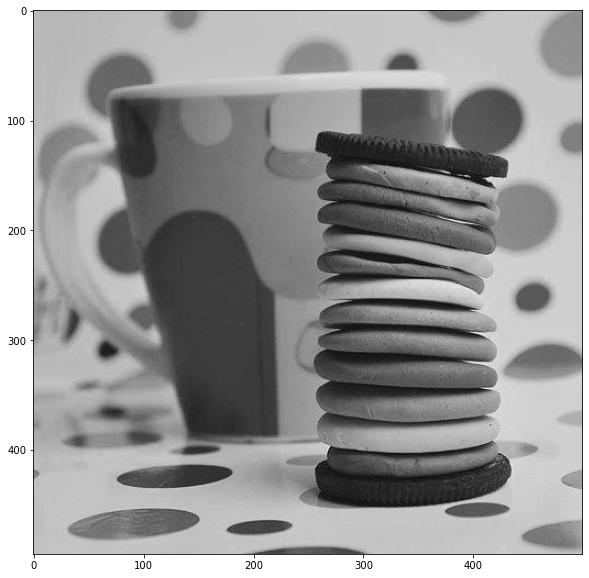

In [8]:
# Afisati imaginea pe nivele de gri

fig = plt.figure(figsize=(10,10)); plt.imshow(imgGray, cmap='gray'); plt.show()

In [9]:
# Extragere si afisare - dimensiune imagine pe nivele de gri (shape)
imgGray.shape

(495, 500)

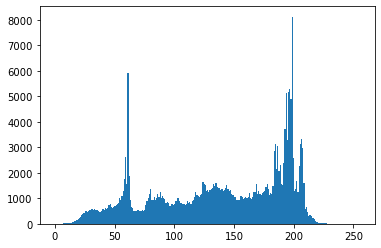

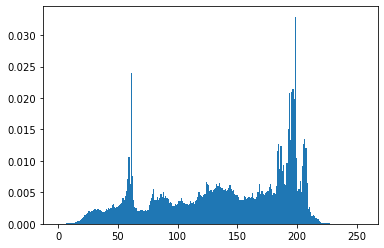

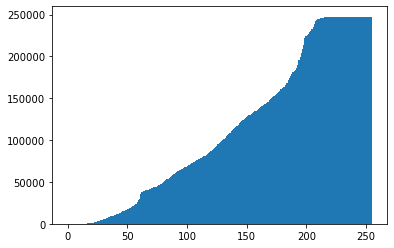

In [10]:
# histograma normala 
(counts, bins, patches) = plt.hist(imgGray.ravel(), 256, [0,255], density=False, cumulative=False )
plt.show()

# histograma normalizata - de completat
(counts, bins, patches) = plt.hist(imgGray.ravel(), 256, [0,255], density=True, cumulative=False )
plt.show()

# histograma cumulativa - de completat
(counts, bins, patches) = plt.hist(imgGray.ravel(), 256, [0,255], density=False, cumulative=True )
plt.show()



## 3. Spatiu RGB, extragere componente si afisarea lor

In [11]:
# Extragerea celor 3 componente R,G, B 

R = imgRGB[:,:,0] 
G = imgRGB[:,:,1]        
B = imgRGB[:,:,2]         
G.shape

(495, 500)

In [12]:
# Extragerea celor 3 componente R,G, B si afisarea lor



   ----- INFO - Spatiu RGB - Componete si Histograme -----



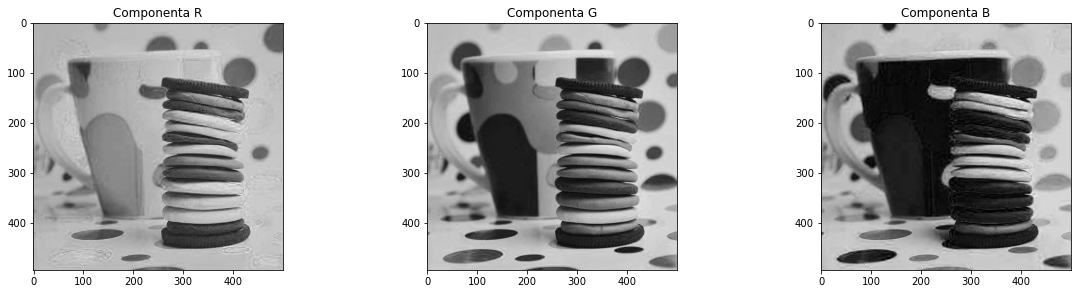

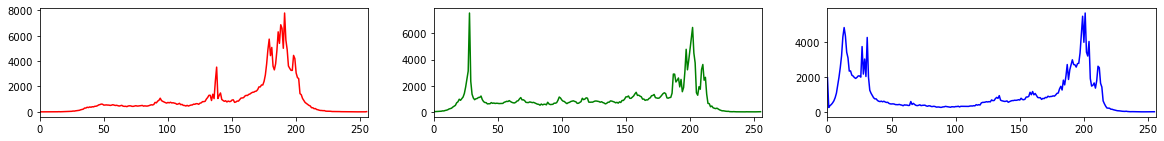

In [13]:
print('\n   ----- INFO - Spatiu RGB - Componete si Histograme -----\n')

compName = ['R', 'G', 'B'] # lista cu numele componentelor

# Afisare componente R, G si B 
fig = plt.figure(figsize=(20,10))
for i, iCompNm in enumerate(compName):
    ax = fig.add_subplot(2,3,i+1)
    plt.imshow(imgRGB[:,:,i],cmap='gray', vmin=0, vmax=255)
    plt.title('Componenta ' + compName[i])
plt.show()

# Afisare histrograme componente R, G si B 
fig = plt.figure(figsize=(20,2))

compName = ['r', 'g', 'b']

for i, iCompNm in enumerate(compName):
    histr = cv2.calcHist([imgRGB],[i],None,[256],[0,256])
    ax = fig.add_subplot(1,3,i+1)
    plt.plot(histr,color = compName[i])
    plt.xlim([0,256])
plt.show()


 Urmarim:
    - gradul de similaritate dintre cele 3 componente (atat sub forma de imagini cat si ca histograma) 
    - putem interpreta ce culori avem in imagine urmarind componentele si histogramele lor?

Treceti aici observatiile voastre:

 - G si B sunt destul de asemanatoare, histograma la R este mult mai diferita fata de celalalte


## 3. Afisare cub RGB 

In [14]:
# Afisare cub RGB 
print('\n   ----- INFO - Cub RGB  -----\n')
print('\n Afisare Cub RGB (contine culorile unice care apar in imagine)')

imgRGBred = np.reshape(imgRGB,(imgRGB.shape[0]*imgRGB.shape[1] ,imgRGB.shape[2]))
uniqvals = np.unique(imgRGBred, axis = 0)

uniqvals.shape[0]



   ----- INFO - Cub RGB  -----


 Afisare Cub RGB (contine culorile unice care apar in imagine)


99698

In [15]:
imgRGBred.shape

(247500, 3)


 	 Numar culori unice posibile pentru o imaginea RGB, 2^24:  16777216

 	 Numar culori unice care apar in imaginea curenta:  99698

 	 Numar culori unice in imaginea curenta, procent:  0.59 % acoperire cub RGB


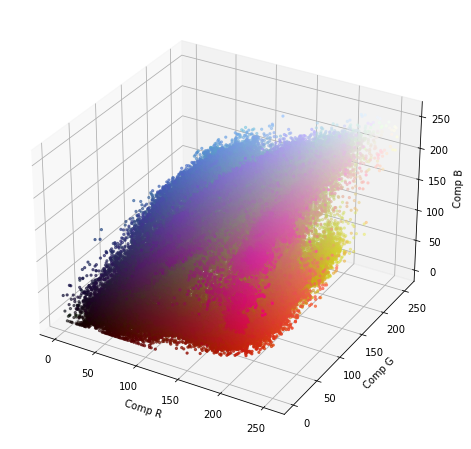

In [16]:
print('\n \t Numar culori unice posibile pentru o imaginea RGB, 2^24: ',2**24)
print('\n \t Numar culori unice care apar in imaginea curenta: ',uniqvals.shape[0])
print('\n \t Numar culori unice in imaginea curenta, procent: ', 
      round(100*(uniqvals.shape[0]/2**24),2), '% acoperire cub RGB' )

nrVals = uniqvals.shape[0]
pas = int(nrVals/3000) + 1

pas = 1

uniqvals_p = uniqvals[range(0, nrVals-1, pas), :].copy()
cli = uniqvals_p.astype(float)/255
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(uniqvals_p[:,0], uniqvals_p[:,1], uniqvals_p[:,2], c=cli, marker='.')
ax.set_xlabel('Comp R'); ax.set_ylabel('Comp G'); ax.set_zlabel('Comp B')
plt.show()

# Urmarim:
#   - cum arata cubul RGB pentru diverse imagini (care contin zone foarte 
#       colorate, care au culori pale, imagini monocrome)

 Se va testa programul pe un numar de imagini 
 la alegere din directorul "D:/_TestImages"
  - ~ 1 imagini monogrome (pe nivele de gri)
  - ~ 2 imagini color (culori pure, peisaje, portret)